In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv("../Datasets/Export/Product-Wise-Time-Series/Wheat.csv", index_col = "Year", parse_dates = True)
df = df.dropna()
df = df[: -2]
df.tail()

,Qty(MT),Rs(Crore),% Share(Qty),% Share(Rs),MT per Crore
Year,,,,,
2018-19,226224.99,424.95,0.976,0.315,532.36
2019-20,217354.23,439.14,1.190,0.368,494.95
2020-21,2088487.66,4037.60,6.504,2.638,517.26
2021-22,7239366.77,15840.34,16.929,8.573,457.02
2022-23,4693264.09,11826.90,10.555,5.353,396.83


In [119]:
df.shape

(35, 5)

In [120]:
df = df[df["% Share(Rs)"] != 0]
df

,Qty(MT),Rs(Crore),% Share(Qty),% Share(Rs),MT per Crore
Year,,,,,
1987-88,253662.00,35.39,24.107,4.671,7167.62
1988-89,15800.00,2.99,1.742,0.373,5284.28
1990-91,139458.00,31.13,14.218,3.378,4479.86
1991-92,658250.00,158.08,28.936,8.770,4164.03
1992-93,36749.00,10.21,2.527,0.502,3599.31
1993-94,350.00,0.19,0.019,0.007,1842.11
1994-95,86628.00,42.34,4.274,1.454,2046.01
1995-96,632468.00,366.76,8.446,4.657,1724.47
1996-97,1145895.17,698.45,18.772,9.120,1640.63


<Axes: xlabel='Year'>

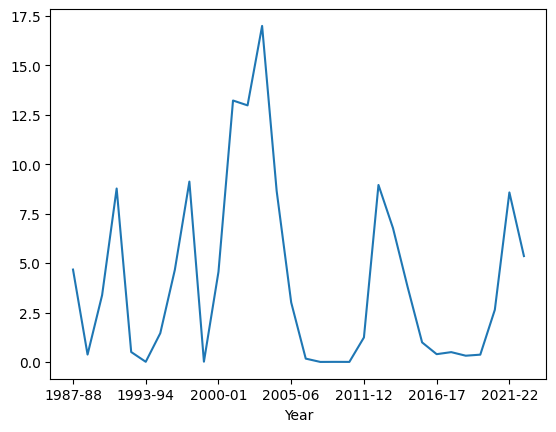

In [121]:
df["% Share(Rs)"].plot()

In [122]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = "AIC")
    print("P value: ", dftest[1])

In [123]:
ad_test(df["% Share(Rs)"])

P value:  0.022925681475839958


In [124]:
ad_test(df["% Share(Qty)"])

P value:  0.03437566575066892


In [136]:
ad_test(df["MT per Crore"])

P value:  0.34913841842655313


In [137]:
ad_test(df["Rs(Crore)"])

P value:  0.9918616443005517


In [138]:
ad_test(df["Qty(MT)"])

P value:  0.13283245033640095


In [125]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [126]:
stepwise_fit = auto_arima(df["% Share(Rs)"], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=185.924, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=191.599, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182.541, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=180.702, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=208.964, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=182.607, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=182.646, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=184.519, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=190.210, Time=0.04 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.014 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -87.351
Date:                Thu, 11 Apr 2024   AIC                            180.702
Time:                        14:42:30   BIC                            185.099
Sample:                             0   HQIC                           182.160
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.1240      1.268      3.252      0.001       1.639       6.609
ma.L1          0.6772      0.173      3.910      0.000       0.338       1.017
sigma2        13.4958      4.175      3.233      0.001       5.313      21.679
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.90
Prob(Q):                              0.78   Prob(JB):                         0.39
Heteroskedasticity (H):               0.59   Skew:                             0.59
Prob(H) (two-sided):                  0.39   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [127]:
from statsmodels.tsa.arima.model import ARIMA

In [132]:
train = df.iloc[: -8]
test = df.iloc[-8: ]
print(train.shape, test.shape)

(24, 5) (8, 5)


In [133]:
model = ARIMA(train["% Share(Rs)"], order=(0, 0, 1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            % Share(Rs)   No. Observations:                   24
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -67.354
Date:                Thu, 11 Apr 2024   AIC                            140.708
Time:                        14:43:39   BIC                            144.242
Sample:                             0   HQIC                           141.646
                                 - 24                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7463      1.492      3.182      0.001       1.823       7.670
ma.L1          0.6808      0.218      3.128      0.002       0.254       1.107
sigma2        15.6273      5.866      2.664      0.008       4.130      27.125
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.73
Prob(Q):                              0.92   Prob(JB):                         0.70
Heteroskedasticity (H):               0.96   Skew:                             0.35
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [134]:
start = len(train)
end = len(test) + len(train) - 1
pred = model.predict(start=start, end = end, typ = "levels")
pred.index = df.index[start:end+1]
print(pred)

Year
2015-16    4.911025
2016-17    4.746296
2017-18    4.746296
2018-19    4.746296
2019-20    4.746296
2020-21    4.746296
2021-22    4.746296
2022-23    4.746296
Name: predicted_mean, dtype: float64


<Axes: xlabel='Year'>

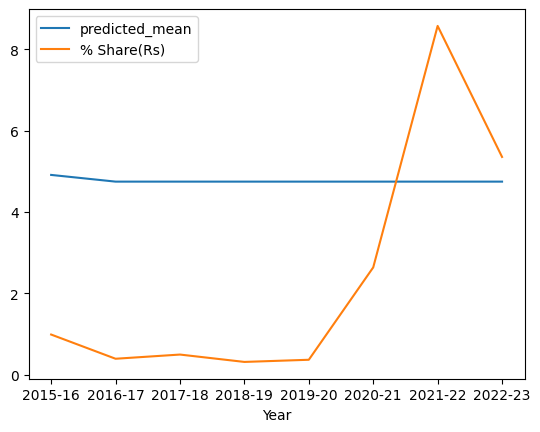

In [135]:
pred.plot(legend=True)
test["% Share(Rs)"].plot(legend=True)